<a href="https://colab.research.google.com/github/ridhikapila27/Deep_learning/blob/main/Lab7_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#install tensorflow
#!pip install -q tensorflow-gpu==2.0.0-beta1
try:
  %tensorflow_version 2.x #colab only
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


In [26]:
# additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [27]:
# load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("x_train.shape:",x_train.shape)


4422102/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [28]:
#the data is only 2D
#convolution expects height x width x colour
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)


(60000, 28, 28, 1)


In [29]:
#number of classes
K = len(set(y_train))
print("No of classes:", K)


No of classes: 10


In [30]:
#Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3),strides=2, activation='relu')(i)
x = Conv2D(64,(3,3),strides=2, activation='relu')(x)
x = Conv2D(128,(3,3),strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)
model = Model(i,x)
#compile and fit (using GPI)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=15)


Epoch 1/15
1875/1875 [==============================] - 38s 19ms/step - loss: 0.5759 - accuracy: 0.7994 - val_loss: 0.4288 - val_accuracy: 0.8441
Epoch 2/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4039 - accuracy: 0.8487 - val_loss: 0.4034 - val_accuracy: 0.8515
Epoch 3/15
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3698 - accuracy: 0.8613 - val_loss: 0.3830 - val_accuracy: 0.8600
Epoch 4/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3456 - accuracy: 0.8699 - val_loss: 0.3595 - val_accuracy: 0.8684
Epoch 5/15
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3262 - accuracy: 0.8773 - val_loss: 0.3547 - val_accuracy: 0.8656
Epoch 6/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3108 - accuracy: 0.8825 - val_loss: 0.3712 - val_accuracy: 0.8643
Epoch 7/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3001 - accuracy: 0.8876 - val_loss: 0.3447 -

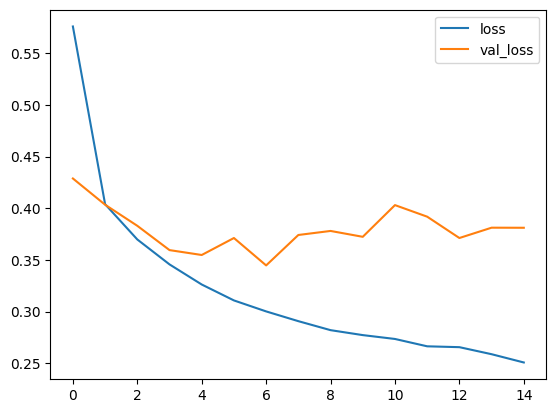

In [31]:
#plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


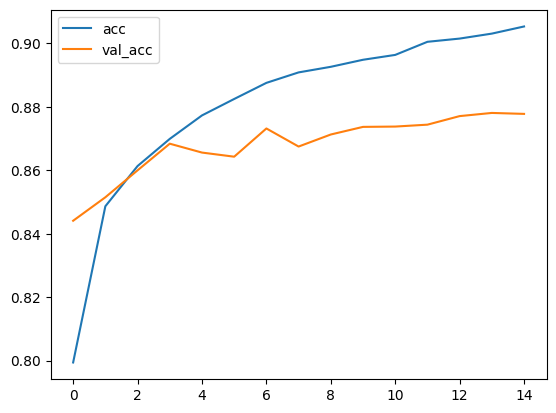

In [32]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 2s 5ms/step
Confusion matrix, without normalization
[[828   2  12  17   6   1 131   0   3   0]
 [  2 975   1  13   2   0   5   0   2   0]
 [ 28   0 736  12 116   0 105   0   3   0]
 [ 16   7  14 892  34   2  32   0   3   0]
 [  1   1  40  24 849   0  84   0   1   0]
 [  1   0   0   1   0 961   0  25   0  12]
 [120   0  58  28 128   0 657   0   9   0]
 [  0   0   0   0   0  12   0 949   1  38]
 [  3   0   3   3   6   6  10   2 967   0]
 [  1   0   0   0   0   5   0  30   0 964]]


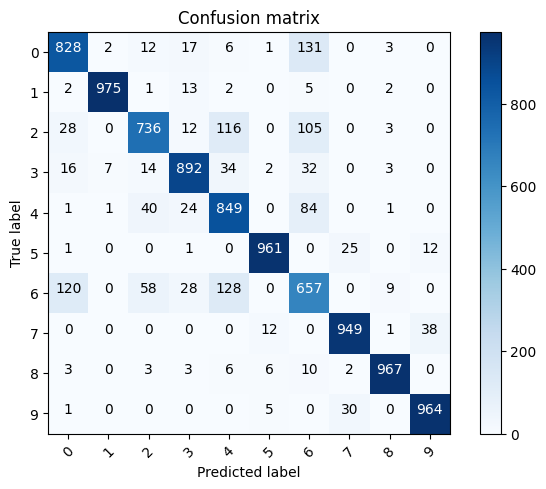

In [33]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix (cm, classes,normalize=False,title= 'Confusion matrix',cmap=plt.cm.Blues):
#This function prints and plots the confusion matrix.
#Normalization can be applied by setting ~normalize=True".
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)
  plt.imshow(cm,interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
      horizontalalignment="center",
      color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


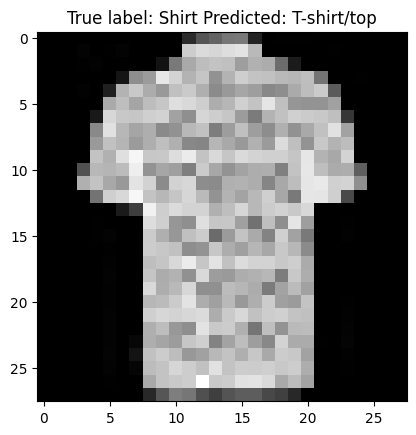

In [34]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));